In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the Image

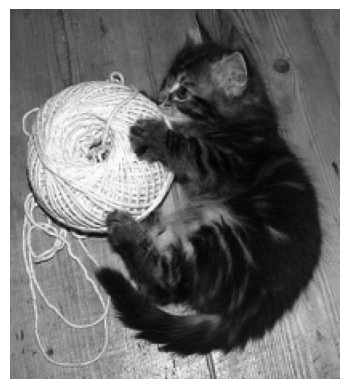

dtype('float64')

In [2]:
# Read and display the uploaded image
img = Image.open('kitty.bmp').convert('L')
img = np.asarray(img, dtype=float)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

img.dtype

# Step1: Convolution Function

In [3]:
def convolve2d(image, kernel):
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2), dtype=float)   
    image_padded[1:-1, 1:-1] = image  # Add zero padding to the input image
    
    rows, cols = image_padded.shape
    convolvedImage = np.zeros((rows-2, cols-2))
    
    for x in range(1, rows - 1):     # Loop over every pixel of the image
        for y in range(1, cols - 1):
            region = image_padded[x-1:x+2, y-1:y+2]
            convolvedImage[x-1,y-1] = np.sum(region * kernel)
    convolvedImage = convolvedImage.astype(float)
    return abs(convolvedImage)/4

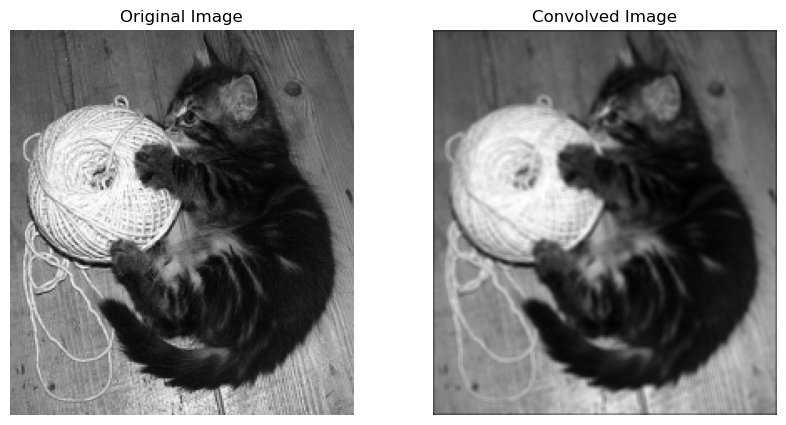

In [4]:
# Smoothed Kerner
kernel = np.ones((3, 3), np.float32) / 9

# Weighted Kernel
weighted_kernel = np.array([[0.8, 1.2, 0.8],
                   [1.2, 2, 1.2],
                   [0.8, 1.2, 0.8]])/10

# Apply convolution
convolved_img = convolve2d(img, kernel)

# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_img, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()

# Step2: Horizontal & Vertical Gradients Image

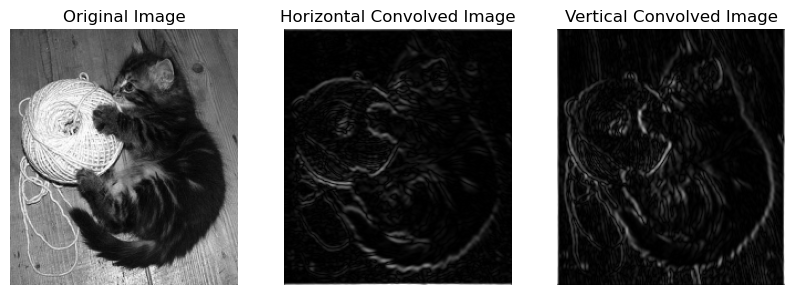

In [5]:
kernel_Gx = np.array([[-1, -2, -1],       # Horizontal Edges
                      [ 0,  0,  0],
                      [ 1,  2,  1]])

kernel_Gy = np.array([[-1, 0, 1],         # Vertical Edges
                      [-2, 0, 2],
                      [-1, 0, 1]])

# Apply convolution
Gx = convolve2d(convolved_img, kernel_Gx)
Gy = convolve2d(convolved_img, kernel_Gy)

# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Horizontal Convolved Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Vertical Convolved Image')
plt.axis('off')

plt.show()


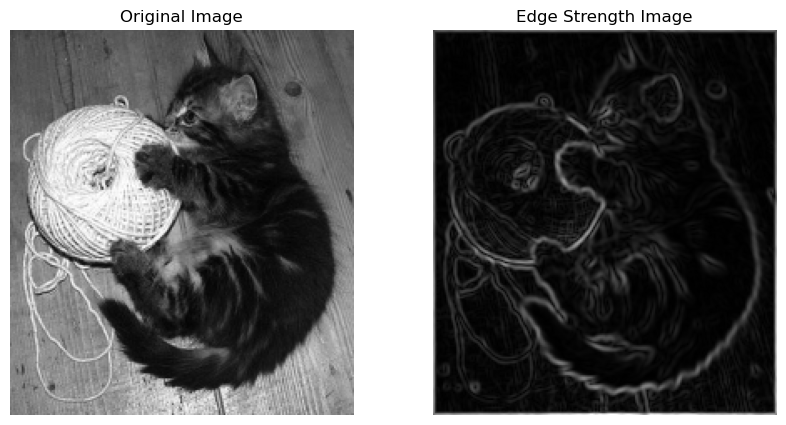

In [6]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(Gy**2 + Gx**2)

# # Normalize the gradient magnitude to the range 0 to 255
# gradient_magnitude = np.uint8((gradient_magnitude / gradient_magnitude.max()) * 255)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edge Strength Image')
plt.axis('off')

plt.show()

# Step3: Perform thresholding of the edge strength image

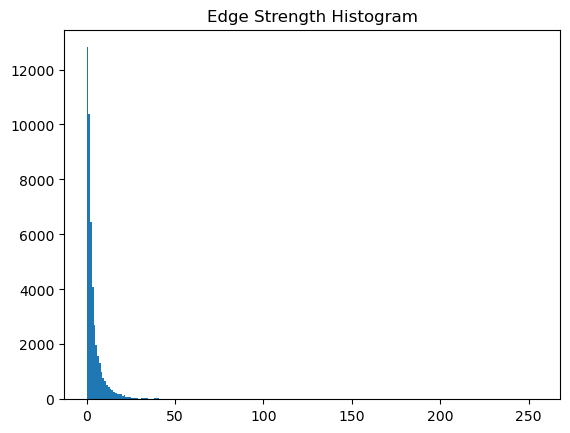

In [7]:
# Show the Histogram

plt.hist(gradient_magnitude.flatten(), bins=256, range=[0, 255])
plt.title('Edge Strength Histogram')
plt.show()

In [8]:
threshold_value = 15

thresholded_image = np.where(gradient_magnitude > threshold_value, 255, 0).astype(float)

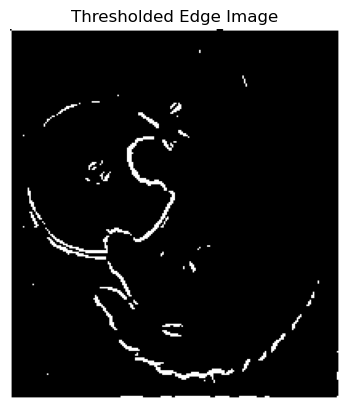

In [9]:
# Show the threshold image

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Edge Image')
plt.axis('off')
plt.show()

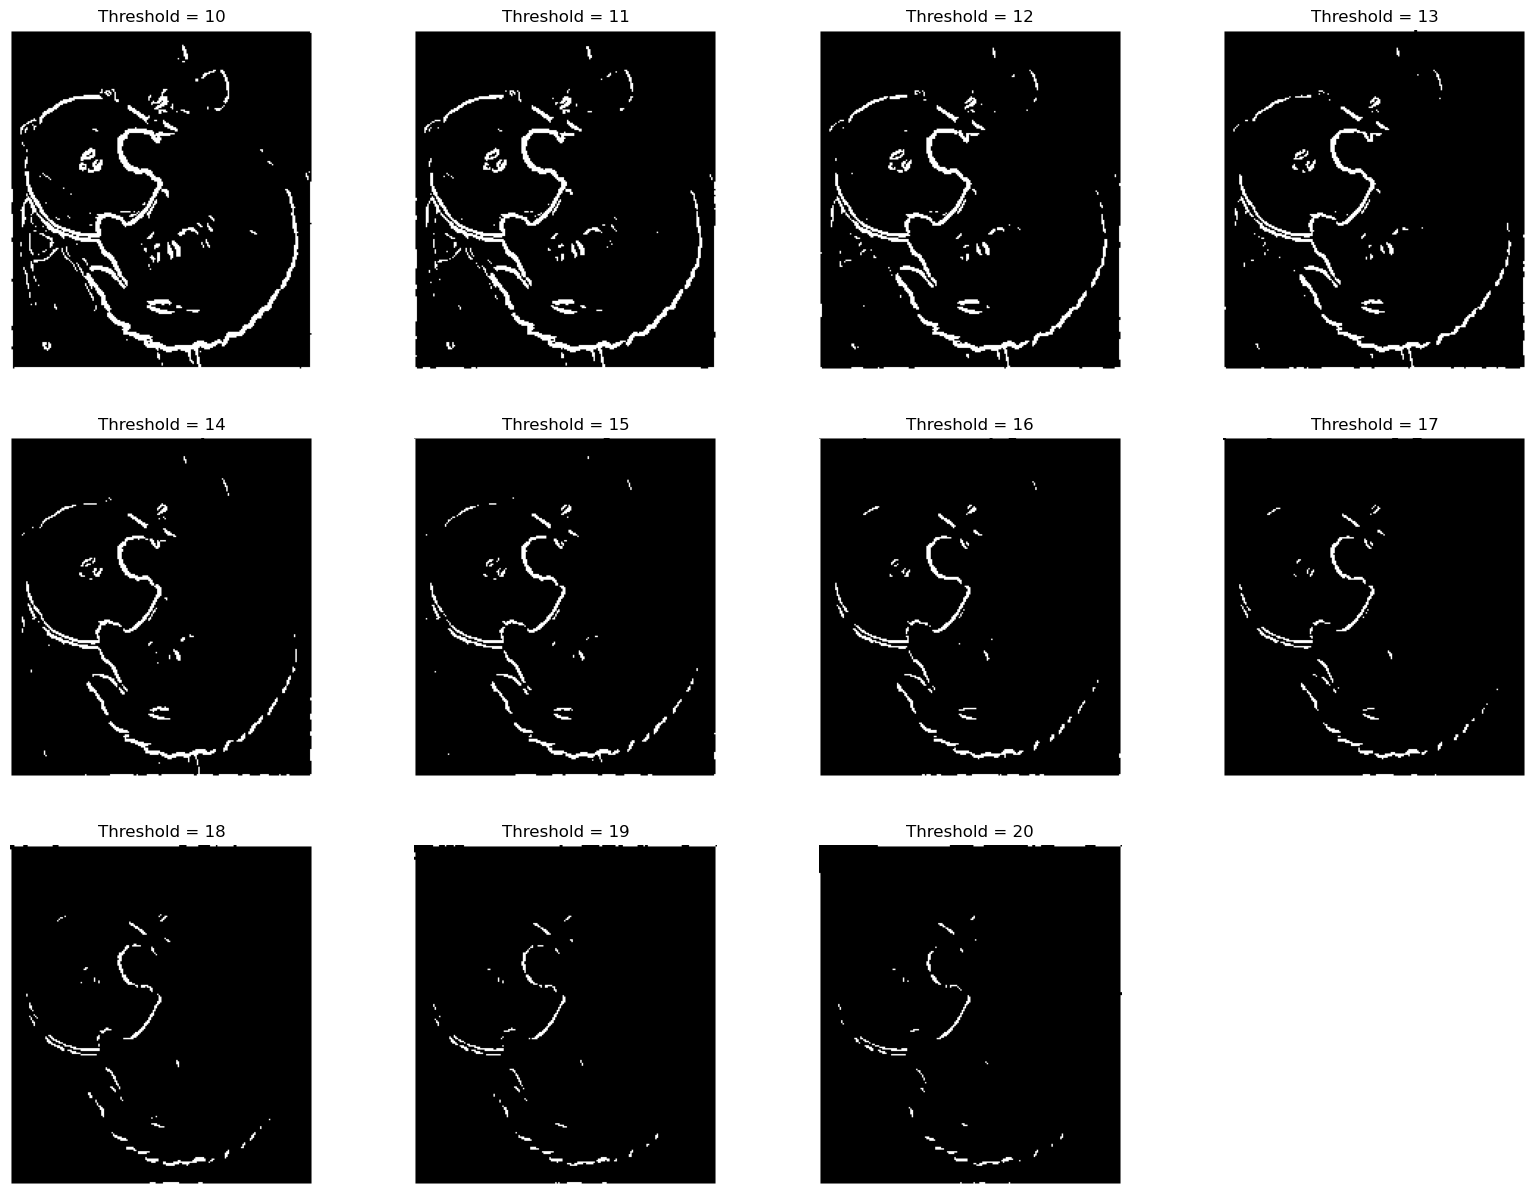

In [10]:
threshold_values = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.figure(figsize=(20,15))
for i, threshold in enumerate(threshold_values):
    plt.subplot(3, 4, i+1)  # Create a new figure for each threshold
    plt.imshow(np.where(gradient_magnitude > threshold, 255, 0).astype(float), cmap='gray')
    plt.title(f'Threshold = {threshold}')
    plt.axis('off')
plt.show()

# Weighted Mean of Kernel and Repeat it

In [11]:
# Weighted Kernel

weighted_kernel = np.array([[0.8, 1.2, 0.8],
                   [1.2, 2, 1.2],
                   [0.8, 1.2, 0.8]])/10

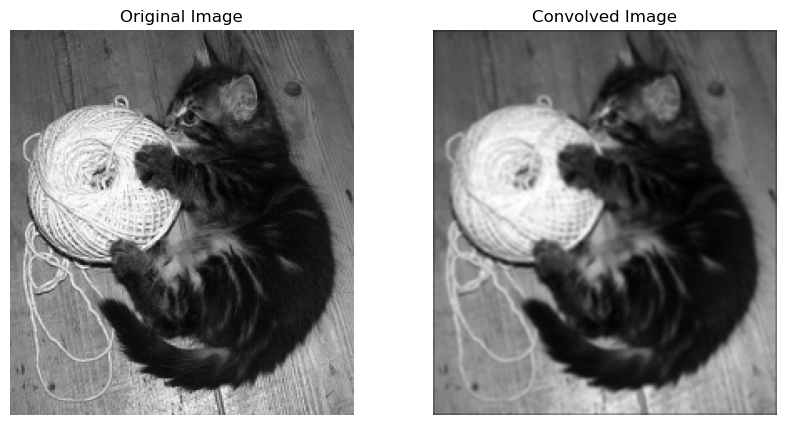

In [12]:
# Apply convolution
convolved_img = convolve2d(img, weighted_kernel)

# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_img, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()

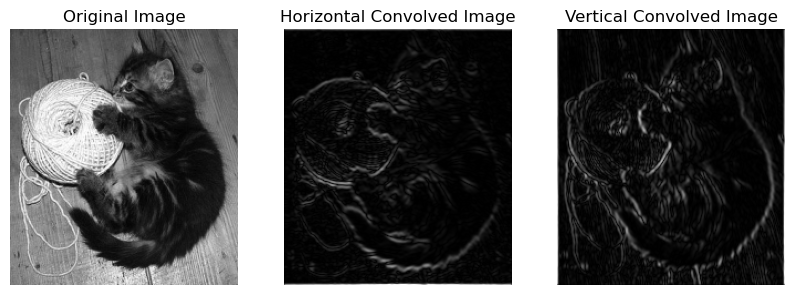

In [13]:
# Apply convolution
Gx = convolve2d(convolved_img, kernel_Gx)
Gy = convolve2d(convolved_img, kernel_Gy)

# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Horizontal Convolved Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Vertical Convolved Image')
plt.axis('off')

plt.show()


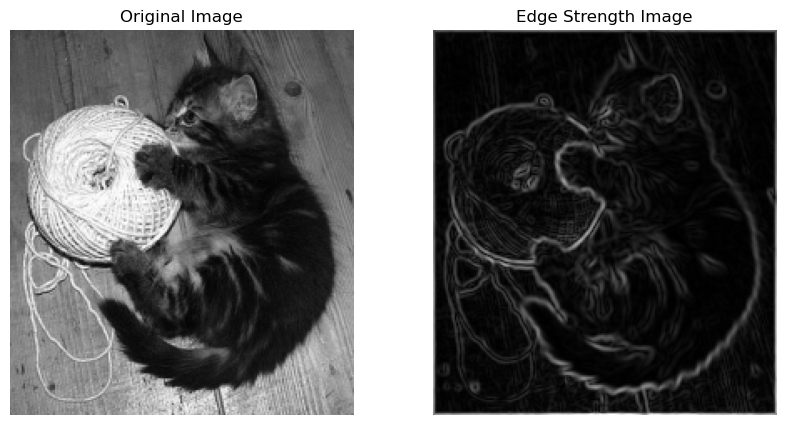

In [14]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(Gy**2 + Gx**2)

# # Normalize the gradient magnitude to the range 0 to 255
# gradient_magnitude = np.uint8((gradient_magnitude / gradient_magnitude.max()) * 255)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edge Strength Image')
plt.axis('off')

plt.show()

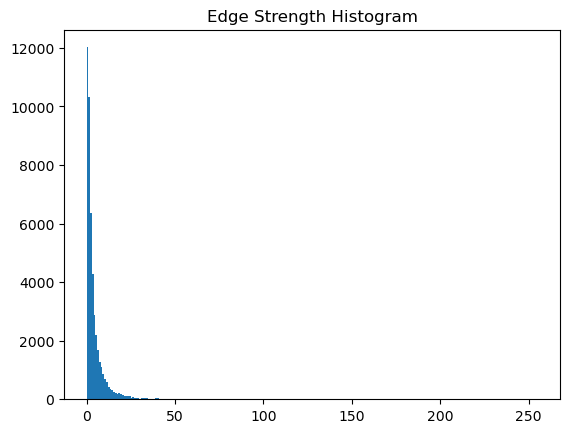

In [15]:
plt.hist(gradient_magnitude.flatten(), bins=256, range=[0, 255])
plt.title('Edge Strength Histogram')
plt.show()

In [16]:
threshold_value = 13

thresholded_image = np.where(gradient_magnitude > threshold_value, 255, 0).astype(float)

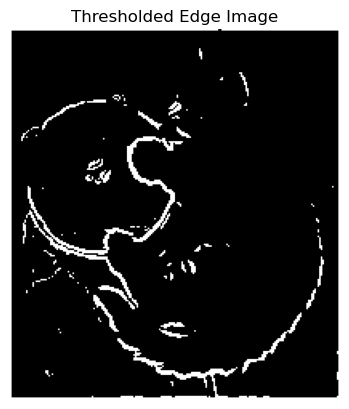

In [17]:
# Show the threshold image

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Edge Image')
plt.axis('off')
plt.show()

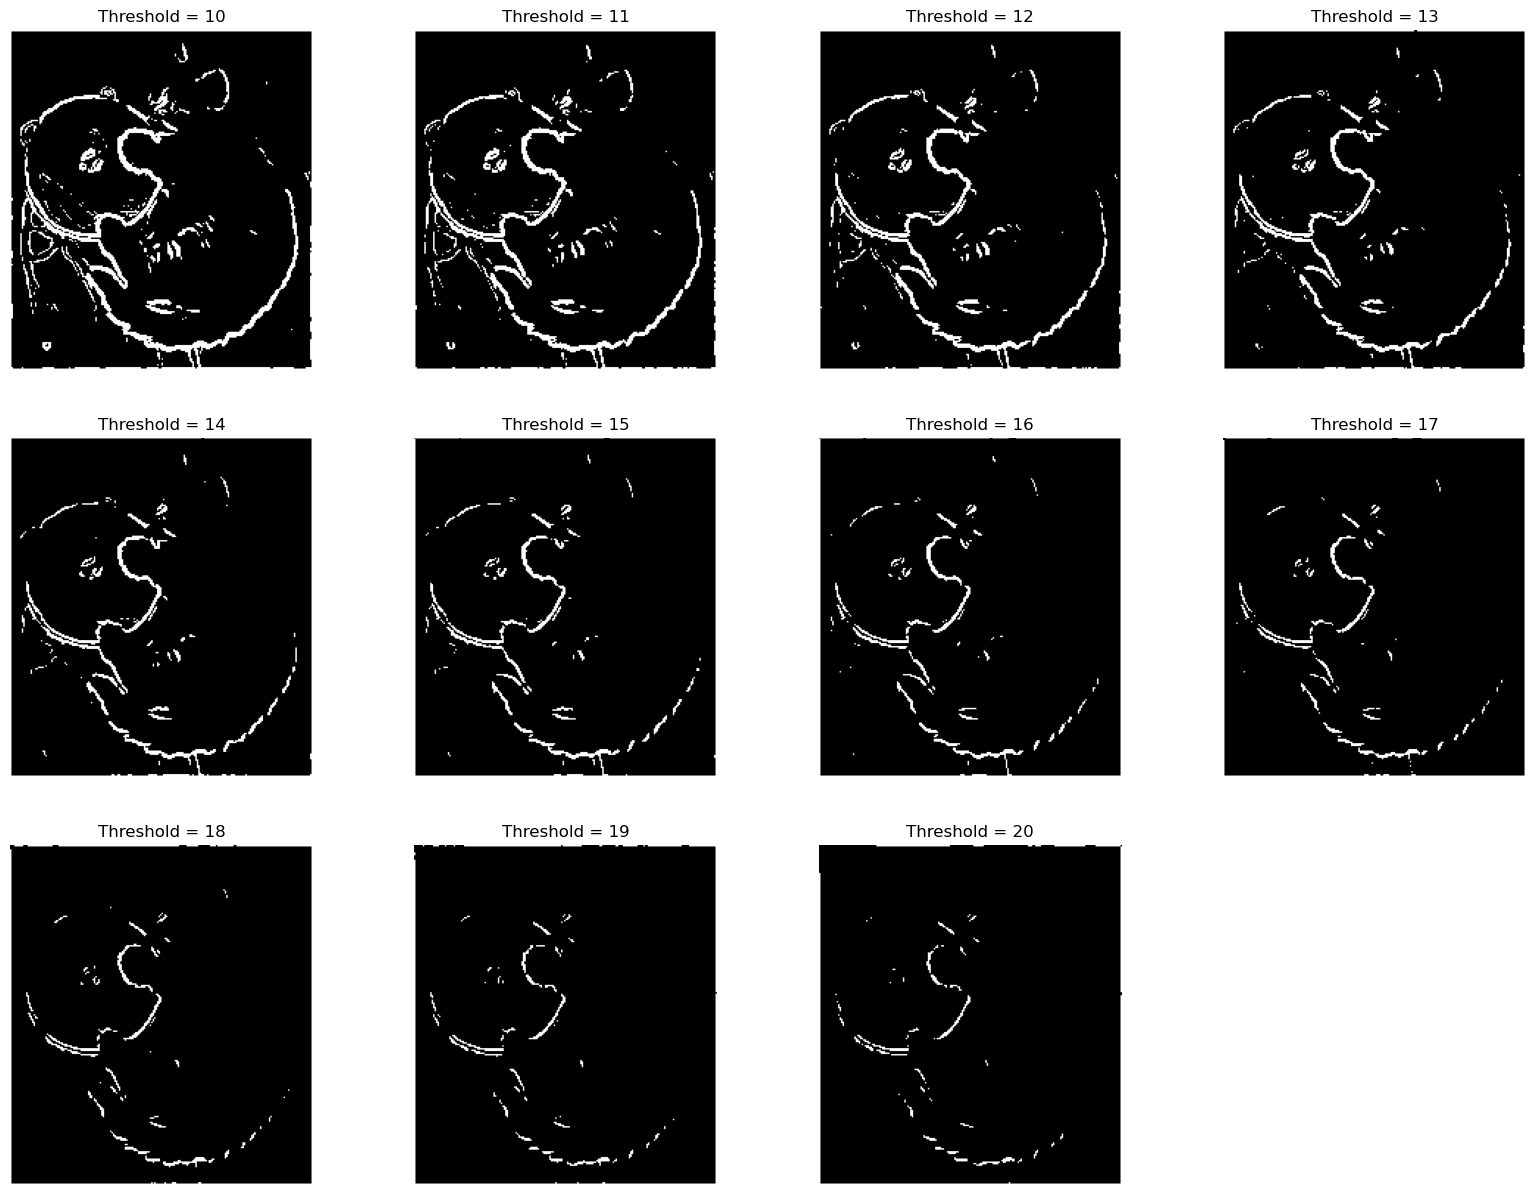

In [18]:
threshold_values = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.figure(figsize=(20,15))
for i, threshold in enumerate(threshold_values):
    plt.subplot(3, 4, i+1)  # Create a new figure for each threshold
    plt.imshow(np.where(gradient_magnitude > threshold, 255, 0).astype(float), cmap='gray')
    plt.title(f'Threshold = {threshold}')
    plt.axis('off')
plt.show()